<a href="https://colab.research.google.com/github/johnrua17/MetNumUN2024I/blob/main/Lab2/jruac_Lab2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install -U fortran-magic

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 6.4 MB/s eta 0:00:00


In [ ]:
%matplotlib inline
%load_ext fortranmagic

import sys; sys.path.append('..')

import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

mpl.rc('figure', figsize=(12, 7))

ran_the_first_cell = True

jan2017 = pd.to_datetime(['2017-01-03 00:00:00+00:00',
 '2017-01-04 00:00:00+00:00',
 '2017-01-05 00:00:00+00:00',
 '2017-01-06 00:00:00+00:00',
 '2017-01-09 00:00:00+00:00',
 '2017-01-10 00:00:00+00:00',
 '2017-01-11 00:00:00+00:00',
 '2017-01-12 00:00:00+00:00',
 '2017-01-13 00:00:00+00:00',
 '2017-01-17 00:00:00+00:00',
 '2017-01-18 00:00:00+00:00',
 '2017-01-19 00:00:00+00:00',
 '2017-01-20 00:00:00+00:00',
 '2017-01-23 00:00:00+00:00',
 '2017-01-24 00:00:00+00:00',
 '2017-01-25 00:00:00+00:00',
 '2017-01-26 00:00:00+00:00',
 '2017-01-27 00:00:00+00:00',
 '2017-01-30 00:00:00+00:00',
 '2017-01-31 00:00:00+00:00',
 '2017-02-01 00:00:00+00:00'])
calendar = jan2017.values.astype('datetime64[D]')

event_dates = pd.to_datetime(['2017-01-06 00:00:00+00:00',
                             '2017-01-07 00:00:00+00:00',
                             '2017-01-08 00:00:00+00:00']).values.astype('datetime64[D]')
event_values = np.array([10, 15, 20])

<center>
  <h1>The PyData Toolbox</h1>
  <h3>Scott Sanderson (Twitter: @scottbsanderson, GitHub: ssanderson)</h3>
  <h3><a href="https://github.com/ssanderson/pydata-toolbox">https://github.com/ssanderson/pydata-toolbox</a></h3>
</center>

# About Me:

<img src="https://raw.githubusercontent.com/ssanderson/pydata-toolbox/master/notebooks/images/me.jpg" alt="Drawing" style="width: 300px;"/>

- Senior Engineer at [Quantopian](www.quantopian.com)
- Background in Mathematics and Philosophy
- **Twitter:** [@scottbsanderson](https://twitter.com/scottbsanderson)
- **GitHub:** [ssanderson](github.com/ssanderson)

## Outline

- Built-in Data Structures
- Numpy `array`
- Pandas `Series`/`DataFrame`
- Plotting and "Real-World" Analyses

# Data Structures

> Rule 5. Data dominates. If you've chosen the right data structures and organized things well, the algorithms
will almost always be self-evident. Data structures, not algorithms, are central to programming.

- *Notes on Programming in C*, by Rob Pike.

# Lists

In [ ]:
assert ran_the_first_cell, "Oh noes!"

NameError: ignored

In [ ]:
l = [1, 'two', 3.0, 4, 5.0, "six"]
l

[1, 'two', 3.0, 4, 5.0, 'six']

In [ ]:
# Lists can be indexed like C-style arrays.
first = l[0]
second = l[1]
print("first:", first)
print("second:", second)

first: 1
second: two


In [ ]:
# Negative indexing gives elements relative to the end of the list.
last = l[-1]
penultimate = l[-2]
print("last:", last)
print("second to last:", penultimate)

last: six
second to last: 5.0


In [ ]:
# Lists can also be sliced, which makes a copy of elements between
# start (inclusive) and stop (exclusive)
sublist = l[1:3]
sublist

['two', 3.0]

In [ ]:
# l[:N] is equivalent to l[0:N].
first_three = l[:3]
first_three

[1, 'two', 3.0]

In [ ]:
# l[3:] is equivalent to l[3:len(l)].
after_three = l[3:]
after_three

[4, 5.0, 'six']

In [ ]:
# There's also a third parameter, "step", which gets every Nth element.
l = ['a', 'b', 'c', 'd', 'e', 'f', 'g','h']
l[1:7:2]

['b', 'd', 'f']

In [ ]:
# This is a cute way to reverse a list.
l[::-1]

['h', 'g', 'f', 'e', 'd', 'c', 'b', 'a']

In [ ]:
# Lists can be grown efficiently (in O(1) amortized time).
l = [1, 2, 3, 4, 5]
print("Before:", l)
l.append('six')
print("After:", l)

Before: [1, 2, 3, 4, 5]
After: [1, 2, 3, 4, 5, 'six']


In [ ]:
# Comprehensions let us perform elementwise computations.
l = [1, 2, 3, 4, 5]
[x * 2 for x in l]

[2, 4, 6, 8, 10]

## Review: Python Lists

- Zero-indexed sequence of arbitrary Python values.
- Slicing syntax: `l[start:stop:step]` copies elements at regular intervals from `start` to `stop`.
- Efficient (`O(1)`) appends and removes from end.
- Comprehension syntax: `[f(x) for x in l if cond(x)]`.

# Dictionaries

In [ ]:
# Dictionaries are key-value mappings.
philosophers = {'David': 'Hume', 'Immanuel': 'Kant', 'Bertrand': 'Russell'}
philosophers

{'Bertrand': 'Russell', 'David': 'Hume', 'Immanuel': 'Kant'}

In [ ]:
# Like lists, dictionaries are size-mutable.
philosophers['Ludwig'] = 'Wittgenstein'
philosophers

{'Bertrand': 'Russell',
 'David': 'Hume',
 'Immanuel': 'Kant',
 'Ludwig': 'Wittgenstein'}

In [ ]:
del philosophers['David']
philosophers

{'Bertrand': 'Russell', 'Immanuel': 'Kant', 'Ludwig': 'Wittgenstein'}

In [ ]:
# No slicing.
philosophers['Bertrand':'Immanuel']

TypeError: unhashable type: 'slice'

## Review: Python Dictionaries

- Unordered key-value mapping from (almost) arbitrary keys to arbitrary values.
- Efficient (`O(1)`) lookup, insertion, and deletion.
- No slicing (would require a notion of order).

<center><img src="https://raw.githubusercontent.com/ssanderson/pydata-toolbox/master/notebooks/images/pacino.gif" alt="Drawing" style="width: 100%;"/></center>


In [ ]:
4 * "a"

'aaaa'

In [3]:
# Suppose we have some matrices...
a = [[1, 2, 3],
     [2, 3, 4],
     [5, 6, 7],
     [1, 1, 1]]

b = [[1, 2, 3, 4],
     [2, 3, 4, 5]]

In [4]:
def matmul(A, B):
    """Multiply matrix A by matrix B."""
    rows_out = len(A)
    cols_out = len(B[0])
    out = [[0 for col in range(cols_out)] for row in range(rows_out)]

    for i in range(rows_out):
        for j in range(cols_out):
            for k in range(len(B)):
                out[i][j] += A[i][k] * B[k][j]
    return out

<center><img src="https://raw.githubusercontent.com/ssanderson/pydata-toolbox/master/notebooks/images/gross.gif" alt="Drawing" style="width: 50%;"/></center>


In [5]:
%%time

matmul(a, b)

CPU times: user 24 µs, sys: 0 ns, total: 24 µs
Wall time: 26.7 µs


[[5, 8, 11, 14], [8, 13, 18, 23], [17, 28, 39, 50], [3, 5, 7, 9]]

**My own example 0 - cpu info**

In [6]:
!cat /proc/cpuinfo

processor	: 0
vendor_id	: GenuineIntel
cpu family	: 6
model		: 79
model name	: Intel(R) Xeon(R) CPU @ 2.20GHz
stepping	: 0
microcode	: 0xffffffff
cpu MHz		: 2200.196
cache size	: 56320 KB
physical id	: 0
siblings	: 2
core id		: 0
cpu cores	: 1
apicid		: 0
initial apicid	: 0
fpu		: yes
fpu_exception	: yes
cpuid level	: 13
wp		: yes
flags		: fpu vme de pse tsc msr pae mce cx8 apic sep mtrr pge mca cmov pat pse36 clflush mmx fxsr sse sse2 ss ht syscall nx pdpe1gb rdtscp lm constant_tsc rep_good nopl xtopology nonstop_tsc cpuid tsc_known_freq pni pclmulqdq ssse3 fma cx16 pcid sse4_1 sse4_2 x2apic movbe popcnt aes xsave avx f16c rdrand hypervisor lahf_lm abm 3dnowprefetch invpcid_single ssbd ibrs ibpb stibp fsgsbase tsc_adjust bmi1 hle avx2 smep bmi2 erms invpcid rtm rdseed adx smap xsaveopt arat md_clear arch_capabilities
bugs		: cpu_meltdown spectre_v1 spectre_v2 spec_store_bypass l1tf mds swapgs taa mmio_stale_data retbleed
bogomips	: 4400.39
clflush size	: 64
cache_alignment	: 64
addres

**My own example 1 - Changing in matmul(A, B) Python len(B) (# of rows of B) for len(A[0]) (# of columns of A)**

In [9]:
def matmul(A, B):
    """Multiply matrix A by matrix B."""
    rows_out = len(B)
    cols_out = len(A[0])
    out = [[0 for col in range(cols_out)] for row in range(rows_out)]

    for i in range(rows_out):
        for j in range(cols_out):
            for k in range(len(B)):
                out[i][j] += A[i][k] * B[k][j]
    return out
matmul(a,b)

[[5, 8, 11], [8, 13, 18]]

**My own example 2 - Verifiying error with in matmul(A, B) Python with the original matrices when changing len(B) (# of rows of B) for len(A[0]) (# of colums of A)**

In [11]:
# Define matrices A and B
A = [[1, 2, 3],
     [4, 5, 6]]

B = [[7, 8],
     [9, 10],
     [11, 12]]
# Shows the error
matmul(a,b)

[[5, 8, 11], [8, 13, 18]]

**My own example 3 - Chekcing the mtarix multiplication compatibility condition  len(A[0]) == len(B)**

In [12]:
# Definición de la función matmul
def matmul(A, B):
    """Multiply matrix A by matrix B."""
    rows_out = len(A)
    cols_out = len(B[0])
    out = [[0 for col in range(cols_out)] for row in range(rows_out)]

    for i in range(rows_out):
        for j in range(cols_out):
            for k in range(len(B)):
                out[i][j] += A[i][k] * B[k][j]
    return out

# Matrices A y B
a = [[1, 2, 3],
     [2, 3, 4],
     [5, 6, 7],
     [1, 1, 1]]

b = [[1, 2, 3, 4],
     [2, 3, 4, 5]]

# Comprobación de compatibilidad y multiplicación de matrices
if len(a[0]) == len(b):
    result = matmul(a, b)
    print("Resultado de la multiplicación de matrices:")
    for row in result:
        print(row)
else:
    print("La multiplicación de matrices no es posible debido a dimensiones incompatibles.")

La multiplicación de matrices no es posible debido a dimensiones incompatibles.


**My own example 4 -  Verifiying error with in matmul(A, B) Python when checking the mtarix multiplication compatibility condition  len(A[0]) == len(B)**

In [13]:
def matmul(A, B):
    """Multiply matrix A by matrix B."""
    rows_out = len(B)
    cols_out = len(A[0])
    out = [[0 for col in range(cols_out)] for row in range(rows_out)]
    if len(A[0]) == len(B):

      for i in range(rows_out):
          for j in range(cols_out):
              for k in range(len(B)):
                  out[i][j] += A[i][k] * B[k][j]
      return out
    else:
      print("Not compatible")
matmul(a,b)

Not compatible


**My own example 5 - Deifining A and B that are compatible for multiplcation**

In [14]:
A = [[1, 2, 3],
     [4, 5, 6]]

B = [[7, 8],
     [9, 10],
     [11, 12]]

**My own example 6 - Runinng the correct Python matrix multiplication code with the matrices with dimensions compatible for multiplication.**

In [15]:
def matmul(A, B):
    """Multiply matrix A by matrix B."""
    rows_out = len(B)
    cols_out = len(A[0])
    out = [[0 for col in range(cols_out)] for row in range(rows_out)]
    if len(A[0]) == len(B):

      for i in range(rows_out):
          for j in range(cols_out):
              for k in range(len(B)):
                  out[i][j] += A[i][k] * B[k][j]
      return out
    else:
      print("Not compatible")
matmul(a,b)

Not compatible


In [ ]:
import random

In [ ]:
random.normalvariate(0,1)

-0.7334916139358563

In [ ]:
import random
def random_matrix(m, n):
    out = []
    for row in range(m):
        out.append([random.random() for _ in range(n)])
    return out

randm = random_matrix(2, 3)
randm

[[0.898419911161167, 0.39447208211671503, 0.4010163433181565],
 [0.02659833551548152, 0.4602308432409854, 0.690134030235504]]

**My own example 7 - Running 10 times matmul(randa, randb) with randa and randb a randon matrices of 600 x 100 and 100 x 600 and calulating the average execution time**

In [16]:
import random

def random_matrix(m, n):
    out = []
    for row in range(m):
        out.append([random.random() for _ in range(n)])
    return out

def matmul(A, B):
    """Multiply matrix A by matrix B."""
    rows_out = len(B)
    cols_out = len(A[0])
    out = [[0 for col in range(cols_out)] for row in range(rows_out)]
    if len(A[0]) == len(B):
        for i in range(rows_out):
            for j in range(cols_out):
                for k in range(len(B)):
                    out[i][j] += A[i][k] * B[k][j]
        return out
    else:
        print("Not compatible")

# Generar 10 pares de matrices aleatorias y multiplicarlas
for i in range(1, 11):
    randa = random_matrix(600, 100)
    randb = random_matrix(100, 600)
    result = matmul(randa, randb)
    if result:
        print(f"Resultado {i}:")
        for row in result:
            print(row)
        print()


Resultado 1:
[24.603119265657202, 24.505931715413755, 18.809073143497756, 22.66571614202044, 20.240453854281924, 21.536215661599787, 22.717192458595832, 21.087774721185507, 22.310593349081476, 21.194559475410614, 17.709827877644948, 24.5240512125395, 19.232605035878926, 22.355224958877006, 20.93618182020762, 21.945222034512728, 21.918034259794567, 19.720193926019572, 21.81878286489863, 20.945776091642713, 22.72539980866483, 20.63962607219809, 19.547635784109087, 23.025480737788275, 21.650001198439796, 23.848949919185653, 23.135867725197517, 23.80146618451144, 24.65658055283376, 21.034384417627734, 19.903862540056775, 22.568604507846096, 20.31439034459199, 22.181262607454666, 21.396137864552426, 19.79763897885131, 19.65246413470621, 22.781539287837628, 21.322379919562668, 23.12534498047422, 19.985723754482603, 20.932749906619335, 19.89582521955313, 20.03765522377839, 21.9760037211679, 22.56332412204257, 21.91724276736824, 20.873199506355718, 23.907916807445446, 21.35569446365014, 23.774

**My own example 8 - Creating the average execution time data frame and adding Python's average execution time**

In [17]:
import timeit
A = [[1, 2],
     [3, 4]]

B = [[5, 6],
     [7, 8]]

# Measure execution time for your example
execution_times = []
for _ in range(1000):
    start_time = timeit.default_timer()
    result = matmul(B, A)
    end_time = timeit.default_timer()
    execution_times.append(end_time - start_time)

# Calculate average execution time for your example
own_example_avg_time = sum(execution_times) / len(execution_times)

# Measure Python's average execution time
python_avg_time = timeit.timeit('matmul(A, B)', globals=globals(), number=1000) / 1000

# Create dataframe
df = pd.DataFrame({
    'Example': ['Example', 'Python'],
    'Average Execution Time (s)': [own_example_avg_time, python_avg_time]
})

print(df)

NameError: name 'pd' is not defined

**My own example 9 - Running 10 times randa and randb mutiplicaction as NumPy arrays  adding NumPy's average execution time**

In [18]:
import numpy as np
import time

# Definir las funciones y matrices
def random_matrix(rows, cols):
    return np.random.rand(rows, cols)

def matmul(a, b):
    return np.matmul(a, b)

# Inicializar las matrices
randa = random_matrix(600, 100)
randb = random_matrix(100, 600)

# Realizar la multiplicación y medir el tiempo 10 veces
num_iterations = 10
execution_times = []

for _ in range(num_iterations):
    start_time = time.time()
    result = matmul(randa, randb)
    end_time = time.time()
    execution_times.append(end_time - start_time)

# Calcular el tiempo promedio
average_execution_time = np.mean(execution_times)

print(f"Tiempo promedio de ejecución: {average_execution_time} Segundos")


Tiempo promedio de ejecución: 0.006094551086425782 Segundos


In [21]:
%%time
randa = random_matrix(600, 100)
randb = random_matrix(100, 600)
x = matmul(randa, randb)

CPU times: user 6.64 ms, sys: 900 µs, total: 7.54 ms
Wall time: 5.17 ms


In [20]:
# Maybe that's not that bad?  Let's try a simpler case.
def python_dot_product(xs, ys):
    return sum(x * y for x, y in zip(xs, ys))

In [19]:
%%fortran
subroutine fortran_dot_product(xs, ys, result)
    double precision, intent(in) :: xs(:)
    double precision, intent(in) :: ys(:)
    double precision, intent(out) :: result

    result = sum(xs * ys)
end

UsageError: Cell magic `%%fortran` not found.


In [ ]:
list_data = [float(i) for i in range(100000)]
array_data = np.array(list_data)

In [ ]:
%%time
python_dot_product(list_data, list_data)

CPU times: user 4 ms, sys: 0 ns, total: 4 ms
Wall time: 6.95 ms


333328333350000.0

In [ ]:
%%time
fortran_dot_product(array_data, array_data)

CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 181 µs


333328333350000.0

<center><img src="https://raw.githubusercontent.com/ssanderson/pydata-toolbox/master/notebooks/images/sloth.gif" alt="Drawing" style="width: 1080px;"/></center>


**My own example 10 - Deifining A (2x2)  and B (2x2)**

In [22]:
%%fortran

program MatrixDefinition
  implicit none

  ! Declare matrices A and B
  real(8) :: A(2,2)
  real(8) :: B(2,2)

  ! Initialize matrices A and B
  A = reshape([1.0d0, 2.0d0, 3.0d0, 4.0d0], shape(A))
  B = reshape([5.0d0, 6.0d0, 7.0d0, 8.0d0], shape(B))

  ! Print the matrices
  write(*,*) 'Matrix A:'
  write(*,*) A

  write(*,*) 'Matrix B:'
  write(*,*) B

end program MatrixDefinition


UsageError: Cell magic `%%fortran` not found.


**My own example 11 - Defining Fortran subroutine matmul(A,B) for 2x2 matrices**

In [23]:
%%fortran
%%writefile matmul.f90
subroutine matmul(A, B, C)
    implicit none
    real(8), dimension(2, 2), intent(in) :: A, B
    real(8), dimension(2, 2), intent(out) :: C
    integer :: i, j, k

    do i = 1, 2
        do j = 1, 2
            C(i, j) = 0.0
            do k = 1, 2
                C(i, j) = C(i, j) + A(i, k) * B(k, j)
            end do
        end do
    end do
end subroutine matmul



UsageError: Cell magic `%%fortran` not found.


**My own example 12 -Run Fortran subroutine matmul(A,B) with a and b 2x2 matrices**

In [24]:
%%fortran
%%writefile matmul.f90
subroutine matmul(A, B, C, m, n, p)
    implicit none
    real(8), dimension(m, n) :: A
    real(8), dimension(n, p) :: B
    real(8), dimension(m, p) :: C
    integer, intent(in) :: m, n, p
    integer :: i, j, k

    do i = 1, m
        do j = 1, p
            C(i, j) = 0.0
            do k = 1, n
                C(i, j) = C(i, j) + A(i, k) * B(k, j)
            end do
        end do
    end do
end subroutine matmul


UsageError: Cell magic `%%fortran` not found.


**My own example 13 - Defining Fortran subroutine matmul(A,B) for 600x100 and 100x600 matrices**

In [25]:
%%fortran

program matrix_multiply
  implicit none
  integer, parameter :: m = 600, n = 100, p = 600
  real(8) :: A(m, n), B(n, p), C(m, p)
  integer :: i, j

  ! Initialize matrices A and B with some values (you can replace this with your own data)
  A = 1.0d0
  B = 2.0d0

  ! Call the matrix multiplication subroutine
  call matmul(A, B, C)

  ! Print the result (you can modify this part as needed)
  write(*,*) "Matrix C (", m, "x", p, "):"
  do i = 1, m
    write(*, '(600F10.3)') (C(i, j), j = 1, p)
  end do

contains

  subroutine matmul(A, B, C)
    real(8), intent(in) :: A(:, :)
    real(8), intent(in) :: B(:, :)
    real(8), intent(out) :: C(:, :)
    integer :: i, j, k

    ! Perform matrix multiplication
    do i = 1, m
      do j = 1, p
        C(i, j) = 0.0d0
        do k = 1, n
          C(i, j) = C(i, j) + A(i, k) * B(k, j)
        end do
      end do
    end do

  end subroutine matmul

end program matrix_multiply


UsageError: Cell magic `%%fortran` not found.


**My own example 14 -Run Fortran subroutine matmul(A,B) with 600x100 and 100x600 matrices**

In [26]:
! matmul.f90
subroutine matmul(A, B, C, m, n, p)
  real(8), dimension(:,:) :: A, B, C
  integer, intent(in) :: m, n, p
  integer :: i, j, k

  do j = 1, p
    do i = 1, m
      C(i, j) = 0.0
      do k = 1, n
        C(i, j) = C(i, j) + A(i, k) * B(k, j)
      end do
    end do
  end do
end subroutine matmul

! Main program to read matrices and call matmul subroutine
program main
  real(8), dimension(:,:), allocatable :: A, B, C
  integer :: m, n, p, i, j

  ! Set matrix dimensions
  m = 600
  n = 100
  p = 600

  ! Allocate and initialize matrices A and B
  allocate(A(m, n), B(n, p), C(m, p))
  do i = 1, m
    do j = 1, n
      A(i, j) = 1.0 ! You can initialize with your values
    end do
  end do
  do i = 1, n
    do j = 1, p
      B(i, j) = 2.0 ! You can initialize with your values
    end do
  end do

  ! Call the matmul subroutine
  call matmul(A, B, C, m, n, p)

  ! Print the result matrix C if needed
  ! print *, "Result Matrix C:"
  ! do i = 1, m
  !   do j = 1, p
  !     print *, C(i, j)
  !   end do
  ! end do

  ! Deallocate matrices
  deallocate(A, B, C)
end program main


SyntaxError: invalid syntax (<ipython-input-26-9c8895043610>, line 2)

**My own example 15 - Running 10 times the  Fortran subroutine matmul(A,B) with 600x100 and 100x600 matrices and adding Fortran magic average execution time to the data frame**

In [28]:
import subprocess
import time
import pandas as pd

# Function to run Fortran code and measure execution time
def run_matmul(m, n, p):
    command = f'./matmul {m} {n} {p}'
    start_time = time.time()
    subprocess.run(command, shell=True)
    end_time = time.time()
    execution_time = end_time - start_time
    return execution_time

# Set matrix dimensions
m, n, p = 600, 100, 600
num_runs = 10

# Create a DataFrame to store execution times
df = pd.DataFrame(columns=['Run', 'Execution Time'])

# Run the Fortran subroutine multiple times and store execution times in the DataFrame
for run in range(1, num_runs + 1):
    execution_time = run_matmul(m, n, p)
    df = df.append({'Run': run, 'Execution Time': execution_time}, ignore_index=True)

# Display the DataFrame
print(df)

    Run  Execution Time
0   1.0        0.005570
1   2.0        0.001770
2   3.0        0.001677
3   4.0        0.002152
4   5.0        0.002065
5   6.0        0.002310
6   7.0        0.002078
7   8.0        0.001948
8   9.0        0.002399
9  10.0        0.002522


<ipython-input-28-985586e6a2c4>:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Run': run, 'Execution Time': execution_time}, ignore_index=True)
<ipython-input-28-985586e6a2c4>:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Run': run, 'Execution Time': execution_time}, ignore_index=True)
<ipython-input-28-985586e6a2c4>:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Run': run, 'Execution Time': execution_time}, ignore_index=True)
<ipython-input-28-985586e6a2c4>:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Run': run, 'Execution Time': execution_time}, ignore_

**My own example 16 - Creating a  Fortran program that mutiplies 10 times A(600x100) and  B (100x600) matrices**

In [29]:
%%fortran
program matrix_multiply
  implicit none
  integer, parameter :: m = 600, n = 100, p = 600
  real(8) :: A(m, n), B(n, p), C(m, p)
  integer :: i, j, k

  ! Initialize matrices A and B with some values (you can replace this with your own data)
  A = 1.0d0
  B = 2.0d0

  ! Perform matrix multiplication
  do i = 1, m
    do j = 1, p
      C(i, j) = 0.0d0
      do k = 1, n
        C(i, j) = C(i, j) + A(i, k) * B(k, j)
      end do
    end do
  end do

  ! Print the result (you can modify this part as needed)
  write(*,*) "Matrix C (", m, "x", p, "):"
  do i = 1, m
    write(*, '(600F10.3)') (C(i, j), j = 1, p)
  end do

end program matrix_multiply


UsageError: Cell magic `%%fortran` not found.


**My own example 17 - Running the Fortran program that mutiplies 10 times A(600x100) and  B (100x600) matrices**

In [30]:
%%fortran
program matrix_multiply
  implicit none
  integer, parameter :: m = 600, n = 100, p = 600
  real(8) :: A(m, n), B(n, p), C(m, p)
  integer :: i, j, run
  real(8) :: start_time, end_time, execution_time, total_execution_time

  ! Initialize matrices A and B with some values (you can replace this with your own data)
  A = 1.0d0
  B = 2.0d0

  ! Initialize total_execution_time
  total_execution_time = 0.0d0

  ! Perform 10 runs
  do run = 1, 10

    ! Measure the start time
    call cpu_time(start_time)

    ! Call the matrix multiplication subroutine
    call matmul(A, B, C)

    ! Measure the end time
    call cpu_time(end_time)

    ! Calculate the execution time
    execution_time = end_time - start_time

    ! Add the execution time to the total
    total_execution_time = total_execution_time + execution_time

    ! Print the result for each run (you can modify this part as needed)
    write(*,*) "Run", run, "- Execution Time:", execution_time, "seconds"

  end do

  ! Calculate the average execution time
  total_execution_time = total_execution_time / 10.0d0

  ! Print the average execution time
  write(*,*) "Average Execution Time:", total_execution_time, "seconds"

contains

  subroutine matmul(A, B, C)
    real(8), intent(in) :: A(:, :)
    real(8), intent(in) :: B(:, :)
    real(8), intent(out) :: C(:, :)
    integer :: i, j, k

    ! Perform matrix multiplication
    do i = 1, m
      do j = 1, p
        C(i, j) = 0.0d0
        do k = 1, n
          C(i, j) = C(i, j) + A(i, k) * B(k, j)
        end do
      end do
    end do

  end subroutine matmul

end program matrix_multiply


UsageError: Cell magic `%%fortran` not found.


**My own example 18 - Adding Fortran average execution time to the data frame**

In [31]:
%%fortran
program matrix_multiply
  implicit none
  integer, parameter :: m = 600, n = 100, p = 600
  real(8) :: A(m, n), B(n, p), C(m, p)
  integer :: i, j
  real(8) :: start_time, end_time, execution_time

  ! Initialize matrices A and B with some values (you can replace this with your own data)
  A = 1.0d0
  B = 2.0d0

  ! Measure the execution time using Fortran's intrinsic function CPU_TIME
  call cpu_time(start_time)

  ! Call the matrix multiplication subroutine
  call matmul(A, B, C)

  ! Measure the end time
  call cpu_time(end_time)

  ! Calculate the execution time
  execution_time = end_time - start_time

  ! Print the result (you can modify this part as needed)
  write(*,*) "Matrix C (", m, "x", p, "):"
  do i = 1, m
    write(*, '(600F10.3)') (C(i, j), j = 1, p)
  end do

  ! Print the execution time
  write(*,*) "Execution Time:", execution_time, "seconds"

contains

  subroutine matmul(A, B, C)
    real(8), intent(in) :: A(:, :)
    real(8), intent(in) :: B(:, :)
    real(8), intent(out) :: C(:, :)
    integer :: i, j, k

    ! Perform matrix multiplication
    do i = 1, m
      do j = 1, p
        C(i, j) = 0.0d0
        do k = 1, n
          C(i, j) = C(i, j) + A(i, k) * B(k, j)
        end do
      end do
    end do

  end subroutine matmul

end program matrix_multiply


UsageError: Cell magic `%%fortran` not found.


**My own example 19 - Creating a c program that mutiplies 10 times A(600x100) and  B (100x600) matrices**

In [32]:
%%writefile matrix_multiply.c
#include <stdio.h>
#include <stdlib.h>

#define M 600
#define N 100
#define P 600

// Función para inicializar una matriz con valores aleatorios
void initializeMatrix(double matrix[N][P], int rows, int cols) {
    for (int i = 0; i < rows; ++i) {
        for (int j = 0; j < cols; ++j) {
            matrix[i][j] = (double)rand() / RAND_MAX;  // Valores aleatorios entre 0 y 1
        }
    }
}

// Función para multiplicar dos matrices
void multiplyMatrices(double A[M][N], double B[N][P], double result[M][P]) {
    for (int i = 0; i < M; ++i) {
        for (int j = 0; j < P; ++j) {
            result[i][j] = 0.0;
            for (int k = 0; k < N; ++k) {
                result[i][j] += A[i][k] * B[k][j];
            }
        }
    }
}

int main() {
    double A[M][N], B[N][P], result[M][P];

    // Inicializar las matrices A y B
    initializeMatrix(A, M, N);
    initializeMatrix(B, N, P);

    // Realizar la multiplicación de matrices 10 veces
    for (int iteration = 1; iteration <= 10; ++iteration) {
        multiplyMatrices(A, B, result);
    }

    printf("Multiplicación de matrices completada 10 veces.\n");

    return 0;
}



Writing matrix_multiply.c


**My own example 20 - Running the c program that mutiplies 10 times A(600x100) and  B (100x600) matrices**

In [33]:
#include <stdio.h>

#define ROWA 600
#define COLA 100
#define COLB 600

void multiply_matrices(int A[ROWA][COLA], int B[COLA][COLB], int result[ROWA][COLB], int rowsA, int colsA, int colsB) {
    int i, j, k;
    for (i = 0; i < rowsA; i++) {
        for (j = 0; j < colsB; j++) {
            result[i][j] = 0;
            for (k = 0; k < colsA; k++) {
                result[i][j] += A[i][k] * B[k][j];
            }
        }
    }
}

int main() {
    int A[ROWA][COLA];
    int B[COLA][COLB];
    int result[ROWA][COLB];

    // Llenar las matrices A y B con datos

    // Repetir el proceso 10 veces
    for (int iteration = 0; iteration < 10; iteration++) {
        // Multiplicar las matrices
        multiply_matrices(A, B, result, ROWA, COLA, COLB);

        // Imprimir la matriz resultante
        printf("Matriz resultante para la iteracion %d:\n", iteration + 1);
        for (int i = 0; i < ROWA; i++) {
            for (int j = 0; j < COLB; j++) {
                printf("%d ", result[i][j]);
            }
            printf("\n");
        }
        printf("\n");
    }

    return 0;
}


SyntaxError: invalid syntax (<ipython-input-33-358c5155da45>, line 7)

**My own example 21 - Adding c average execution time to the data frame**

**My own example 22 - Creating a C++ program that mutiplies 10 times A(600x100) and  B (100x600) matrices**

In [34]:
#include <iostream>
#include <vector>

using namespace std;

const int ROWA = 600;
const int COLA = 100;
const int COLB = 600;

void multiply_matrices(const vector<vector<int>>& A, const vector<vector<int>>& B, vector<vector<int>>& result) {
    for (int i = 0; i < ROWA; ++i) {
        for (int j = 0; j < COLB; ++j) {
            result[i][j] = 0;
            for (int k = 0; k < COLA; ++k) {
                result[i][j] += A[i][k] * B[k][j];
            }
        }
    }
}

int main() {
    vector<vector<int>> A(ROWA, vector<int>(COLA));
    vector<vector<int>> B(COLA, vector<int>(COLB));
    vector<vector<int>> result(ROWA, vector<int>(COLB));

    // Llenar las matrices A y B con datos

    // Repetir el proceso 10 veces
    for (int iteration = 0; iteration < 10; ++iteration) {
        // Multiplicar las matrices
        multiply_matrices(A, B, result);

        // Imprimir la matriz resultante
        cout << "Matriz resultante para la iteracion " << iteration + 1 << ":\n";
        for (int i = 0; i < ROWA; ++i) {
            for (int j = 0; j < COLB; ++j) {
                cout << result[i][j] << " ";
            }
            cout << endl;
        }
        cout << endl;
    }

    return 0;
}


SyntaxError: invalid syntax (<ipython-input-34-a1784f397060>, line 4)

**My own example 23 - Running the C++ program that mutiplies 10 times A(600x100) and  B (100x600) matrices**

**My own example 24 - Adding C++ average execution time to the data frame**

In [35]:
import timeit
import pandas as pd

# Write C++ code to a file
cpp_code = """
#include <iostream>
#include <vector>
#include <chrono>

int main() {
    // Define matrix A (600x100)
    std::vector<std::vector<int>> A(600, std::vector<int>(100, 1));

    // Define matrix B (100x600)
    std::vector<std::vector<int>> B(100, std::vector<int>(600, 2));

    // Result matrix C (600x600)
    std::vector<std::vector<int>> C(600, std::vector<int>(600, 0));

    // Matrix multiplication
    auto start_time = std::chrono::high_resolution_clock::now();

    for (int i = 0; i < 600; ++i) {
        for (int j = 0; j < 600; ++j) {
            for (int k = 0; k < 100; ++k) {
                C[i][j] += A[i][k] * B[k][j];
            }
        }
    }

    auto end_time = std::chrono::high_resolution_clock::now();
    auto duration = std::chrono::duration_cast<std::chrono::microseconds>(end_time - start_time).count();

    // Print the execution time in microseconds
    std::cout << duration << std::endl;

    return 0;
}
"""

with open("matrix_multiply.cpp", "w") as file:
    file.write(cpp_code)

# Compile and run the C++ code and measure execution time
cpp_execution_time = !g++ matrix_multiply.cpp -o matrix_multiply && ./matrix_multiply

# Create a DataFrame
data = {'Execution Time (microseconds)': [int(cpp_execution_time[0])]}
df = pd.DataFrame(data)

# Display the DataFrame
df


,Execution Time (microseconds)
0,1261233


**My own example 25 - Creating a Java program that mutiplies 10 times A(600x100) and  B (100x600) matrices**

In [36]:
%%shell

# Save the Java code to a file
echo '
public class MatrixMultiplication {
    public static void main(String[] args) {
        // Define matrix A (600x100)
        int[][] A = new int[600][100];
        // Initialize A with some values (you can modify this as needed)

        // Define matrix B (100x600)
        int[][] B = new int[100][600];
        // Initialize B with some values (you can modify this as needed)

        // Result matrix C (600x600)
        int[][] C = new int[600][600];

        // Number of iterations for averaging execution time
        int numIterations = 10;

        // Measure execution time
        long totalTime = 0;

        for (int iteration = 0; iteration < numIterations; iteration++) {
            long startTime = System.currentTimeMillis();

            // Matrix multiplication
            for (int i = 0; i < 600; ++i) {
                for (int j = 0; j < 600; ++j) {
                    for (int k = 0; k < 100; ++k) {
                        C[i][j] += A[i][k] * B[k][j];
                    }
                }
            }

            long endTime = System.currentTimeMillis();
            long executionTime = endTime - startTime;
            System.out.println("Iteration " + (iteration + 1) + " Execution Time: " + executionTime + " ms");

            totalTime += executionTime;

            // Reset result matrix for the next iteration
            resetMatrix(C);
        }

        // Calculate average execution time
        long averageTime = totalTime / numIterations;
        System.out.println("Average Execution Time: " + averageTime + " ms");
    }

    // Helper method to reset matrix values
    private static void resetMatrix(int[][] matrix) {
        for (int i = 0; i < matrix.length; i++) {
            for (int j = 0; j < matrix[i].length; j++) {
                matrix[i][j] = 0;
            }
        }
    }
}
' > /content/MatrixMultiplication.java

# Compile and run the Java code
javac /content/MatrixMultiplication.java
java -classpath /content MatrixMultiplication


Iteration 1 Execution Time: 110 ms
Iteration 2 Execution Time: 130 ms
Iteration 3 Execution Time: 102 ms
Iteration 4 Execution Time: 96 ms
Iteration 5 Execution Time: 96 ms
Iteration 6 Execution Time: 95 ms
Iteration 7 Execution Time: 109 ms
Iteration 8 Execution Time: 95 ms
Iteration 9 Execution Time: 95 ms
Iteration 10 Execution Time: 94 ms
Average Execution Time: 102 ms


**My own example 26 - Running the Java program that mutiplies 10 times A(600x100) and  B (100x600) matrices**

In [37]:
%%shell

# Save the Java code to a file
echo '
public class MatrixMultiplication {
    public static void main(String[] args) {
        // Define matrix A (600x100)
        int[][] A = new int[600][100];
        // Initialize A with some values (you can modify this as needed)

        // Define matrix B (100x600)
        int[][] B = new int[100][600];
        // Initialize B with some values (you can modify this as needed)

        // Result matrix C (600x600)
        int[][] C = new int[600][600];

        // Number of iterations for averaging execution time
        int numIterations = 10;

        // Measure execution time
        long totalTime = 0;

        for (int iteration = 0; iteration < numIterations; iteration++) {
            long startTime = System.currentTimeMillis();

            // Matrix multiplication
            for (int i = 0; i < 600; ++i) {
                for (int j = 0; j < 600; ++j) {
                    for (int k = 0; k < 100; ++k) {
                        C[i][j] += A[i][k] * B[k][j];
                    }
                }
            }

            long endTime = System.currentTimeMillis();
            long executionTime = endTime - startTime;
            System.out.println("Iteration " + (iteration + 1) + " Execution Time: " + executionTime + " ms");

            totalTime += executionTime;

            // Reset result matrix for the next iteration
            resetMatrix(C);
        }

        // Calculate average execution time
        long averageTime = totalTime / numIterations;
        System.out.println("Average Execution Time: " + averageTime + " ms");
    }

    // Helper method to reset matrix values
    private static void resetMatrix(int[][] matrix) {
        for (int i = 0; i < matrix.length; i++) {
            for (int j = 0; j < matrix[i].length; j++) {
                matrix[i][j] = 0;
            }
        }
    }
}
' > /content/MatrixMultiplication.java

# Compile and run the Java code
javac /content/MatrixMultiplication.java
java -classpath /content MatrixMultiplication


Iteration 1 Execution Time: 114 ms
Iteration 2 Execution Time: 133 ms
Iteration 3 Execution Time: 100 ms
Iteration 4 Execution Time: 111 ms
Iteration 5 Execution Time: 93 ms
Iteration 6 Execution Time: 95 ms
Iteration 7 Execution Time: 98 ms
Iteration 8 Execution Time: 93 ms
Iteration 9 Execution Time: 94 ms
Iteration 10 Execution Time: 97 ms
Average Execution Time: 102 ms


**My own example 27 - Adding Java average execution time to the data frame**

In [38]:
import pandas as pd
import subprocess
import re

# Guarda el código Java en un archivo
java_code = '''
public class MatrixMultiplication {
    public static void main(String[] args) {
        // Define matrix A (600x100)
        int[][] A = new int[600][100];
        // Initialize A with some values (you can modify this as needed)

        // Define matrix B (100x600)
        int[][] B = new int[100][600];
        // Initialize B with some values (you can modify this as needed)

        // Result matrix C (600x600)
        int[][] C = new int[600][600];

        // Number of iterations for averaging execution time
        int numIterations = 10;

        // Measure execution time
        long totalTime = 0;

        for (int iteration = 0; iteration < numIterations; iteration++) {
            long startTime = System.currentTimeMillis();

            // Matrix multiplication
            for (int i = 0; i < 600; ++i) {
                for (int j = 0; j < 600; ++j) {
                    for (int k = 0; k < 100; ++k) {
                        C[i][j] += A[i][k] * B[k][j];
                    }
                }
            }

            long endTime = System.currentTimeMillis();
            long executionTime = endTime - startTime;
            System.out.println("Iteration " + (iteration + 1) + " Execution Time: " + executionTime + " ms");

            totalTime += executionTime;

            // Reset result matrix for the next iteration
            resetMatrix(C);
        }

        // Calculate average execution time
        long averageTime = totalTime / numIterations;
        System.out.println("Average Execution Time: " + averageTime + " ms");
    }

    // Helper method to reset matrix values
    private static void resetMatrix(int[][] matrix) {
        for (int i = 0; i < matrix.length; i++) {
            for (int j = 0; j < matrix[i].length; j++) {
                matrix[i][j] = 0;
            }
        }
    }
}
'''

with open("/content/MatrixMultiplication.java", "w") as file:
    file.write(java_code)

# Compila y ejecuta el código Java
compile_command = "javac /content/MatrixMultiplication.java"
run_command = "java -classpath /content MatrixMultiplication"

# Ejecuta el comando de compilación
subprocess.run(compile_command, shell=True)

# Ejecuta el comando de ejecución y captura la salida
try:
    output = subprocess.check_output(run_command, shell=True, text=True)
    # Extrae los tiempos de ejecución de cada iteración
    execution_times = [int(match.group(1)) for match in re.finditer(r'Iteration \d+ Execution Time: (\d+) ms', output)]
    if not execution_times:
        raise ValueError("No se encontraron tiempos de ejecución en la salida.")
    # Calcula el tiempo de ejecución promedio
    average_execution_time = sum(execution_times) / len(execution_times)
except subprocess.CalledProcessError as e:
    print(f"Error al ejecutar el programa Java: {e}")
    average_execution_time = None

# Crea un DataFrame con el tiempo de ejecución promedio
data = {'Average Execution Time (ms)': [average_execution_time]}
df = pd.DataFrame(data)

# Muestra el DataFrame
df


,Average Execution Time (ms)
0,121.3


**My own example 28 - Creating a Javascript program that mutiplies 10 times A(600x100) and  B (100x600) matrices**

In [39]:
# Instala nodejs en Colab
!apt-get -y install nodejs

# Guarda el código JavaScript en un archivo
javascript_code = """
function multiplyMatrices(A, B) {
    var result = [];
    for (var i = 0; i < A.length; i++) {
        result[i] = [];
        for (var j = 0; j < B[0].length; j++) {
            result[i][j] = 0;
            for (var k = 0; k < A[0].length; k++) {
                result[i][j] += A[i][k] * B[k][j];
            }
        }
    }
    return result;
}

// Define matrix A (600x100)
var A = new Array(600).fill([]).map(() => new Array(100).fill(1));

// Define matrix B (100x600)
var B = new Array(100).fill([]).map(() => new Array(600).fill(2));

// Perform matrix multiplication 10 times
for (var iteration = 1; iteration <= 10; iteration++) {
    var startTime = new Date().getTime();

    var result = multiplyMatrices(A, B);

    var endTime = new Date().getTime();
    var executionTime = endTime - startTime;
    console.log("Iteration " + iteration + " Execution Time: " + executionTime + " ms");

    // Reset result matrix for the next iteration
    result = null;
}
"""

with open("/content/matrix_multiplication.js", "w") as file:
    file.write(javascript_code)

# Ejecuta el código JavaScript usando nodejs
!node /content/matrix_multiplication.js


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  libc-ares2 libnode72 nodejs-doc
Suggested packages:
  npm
The following NEW packages will be installed:
  libc-ares2 libnode72 nodejs nodejs-doc
0 upgraded, 4 newly installed, 0 to remove and 35 not upgraded.
Need to get 13.4 MB of archives.
After this operation, 51.8 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy-updates/main amd64 libc-ares2 amd64 1.18.1-1ubuntu0.22.04.2 [45.0 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy-updates/universe amd64 libnode72 amd64 12.22.9~dfsg-1ubuntu3.3 [10.8 MB]
Get:3 http://archive.ubuntu.com/ubuntu jammy-updates/universe amd64 nodejs-doc all 12.22.9~dfsg-1ubuntu3.3 [2,410 kB]
Get:4 http://archive.ubuntu.com/ubuntu jammy-updates/universe amd64 nodejs amd64 12.22.9~dfsg-1ubuntu3.3 [122 kB]
Fetched 13.4 MB in 3s (4,546 kB/s)
Selecting previously unselected packa

**My own example 29 - Running the Javascript program that mutiplies 10 times A(600x100) and  B (100x600) matrices**

In [40]:
from IPython.display import HTML
import time
import pandas as pd

# Define el código JavaScript
javascript_code = """
<script>
function multiplyMatrices(A, B) {
    var result = [];
    for (var i = 0; i < A.length; i++) {
        result[i] = [];
        for (var j = 0; j < B[0].length; j++) {
            result[i][j] = 0;
            for (var k = 0; k < A[0].length; k++) {
                result[i][j] += A[i][k] * B[k][j];
            }
        }
    }
    return result;
}

// Define matrix A (600x100)
var A = new Array(600).fill([]).map(() => new Array(100).fill(1));

// Define matrix B (100x600)
var B = new Array(100).fill([]).map(() => new Array(600).fill(2));

// Crear un elemento div para almacenar las salidas de la consola
var consoleOutput = document.createElement('div');
document.body.appendChild(consoleOutput);

// Función para redirigir la consola al elemento div
function redirectConsoleLog() {
    var originalConsoleLog = console.log;
    console.log = function() {
        originalConsoleLog.apply(console, arguments);
        consoleOutput.innerHTML += Array.from(arguments).join(' ') + '<br>';
    };
}

// Redirigir la consola
redirectConsoleLog();

// Perform matrix multiplication 10 times
for (var iteration = 1; iteration <= 10; iteration++) {
    var startTime = new Date().getTime();

    var result = multiplyMatrices(A, B);

    var endTime = new Date().getTime();
    var executionTime = endTime - startTime;
    console.log("Iteration " + iteration + " Execution Time: " + executionTime + " ms");

    // Reset result matrix for the next iteration
    result = null;
}
</script>
"""

# Muestra el bloque HTML en la celda de código
HTML(javascript_code)


**My own example 30 - Adding Javascript average execution time to the data frame**

In [41]:
from IPython.display import HTML, Javascript
import pandas as pd
import re

# Define el código JavaScript
javascript_code = """
<script>
function multiplyMatrices(A, B) {
    var result = [];
    for (var i = 0; i < A.length; i++) {
        result[i] = [];
        for (var j = 0; j < B[0].length; j++) {
            result[i][j] = 0;
            for (var k = 0; k < A[0].length; k++) {
                result[i][j] += A[i][k] * B[k][j];
            }
        }
    }
    return result;
}

// Define matrix A (600x100)
var A = new Array(600).fill([]).map(() => new Array(100).fill(1));

// Define matrix B (100x600)
var B = new Array(100).fill([]).map(() => new Array(600).fill(2));

// Crear un elemento div para almacenar las salidas de la consola
var consoleOutput = document.createElement('div');
document.body.appendChild(consoleOutput);

// Función para redirigir la consola al elemento div
function redirectConsoleLog() {
    var originalConsoleLog = console.log;
    console.log = function() {
        originalConsoleLog.apply(console, arguments);
        consoleOutput.innerHTML += Array.from(arguments).join(' ') + '<br>';
    };
}

// Redirigir la consola
redirectConsoleLog();

// Array para almacenar los tiempos de ejecución
var executionTimes = [];

// Perform matrix multiplication 10 times
for (var iteration = 1; iteration <= 10; iteration++) {
    var startTime = new Date().getTime();

    var result = multiplyMatrices(A, B);

    var endTime = new Date().getTime();
    var executionTime = endTime - startTime;
    console.log("Iteration " + iteration + " Execution Time: " + executionTime + " ms");

    // Almacenar el tiempo de ejecución
    executionTimes.push(executionTime);

    // Reset result matrix for the next iteration
    result = null;
}

// Calcular el tiempo de ejecución promedio
var averageExecutionTime = executionTimes.reduce(function(a, b) { return a + b; }) / executionTimes.length;

// Mostrar el tiempo de ejecución promedio en la salida para que Colab lo capture
IPython.notebook.kernel.execute("average_execution_time = " + averageExecutionTime);
</script>
"""

# Ejecutar el código JavaScript
output = Javascript(javascript_code)
display(output)

# Esperar unos segundos para asegurar que se capturen los resultados
time.sleep(5)

# Mostrar el tiempo de ejecución promedio
print("Average Execution Time (ms):", average_execution_time)


<IPython.core.display.Javascript object>

Average Execution Time (ms): 121.3


**My own example 31 - Finding the minimun average esecuiton time in the data frame**

In [42]:
from IPython.display import HTML, Javascript
import pandas as pd
import re
import time

# Define el código JavaScript
javascript_code = """
<script>
function multiplyMatrices(A, B) {
    var result = [];
    for (var i = 0; i < A.length; i++) {
        result[i] = [];
        for (var j = 0; j < B[0].length; j++) {
            result[i][j] = 0;
            for (var k = 0; k < A[0].length; k++) {
                result[i][j] += A[i][k] * B[k][j];
            }
        }
    }
    return result;
}

// Define matrix A (600x100)
var A = new Array(600).fill([]).map(() => new Array(100).fill(1));

// Define matrix B (100x600)
var B = new Array(100).fill([]).map(() => new Array(600).fill(2));

// Crear un elemento div para almacenar las salidas de la consola
var consoleOutput = document.createElement('div');
document.body.appendChild(consoleOutput);

// Función para redirigir la consola al elemento div
function redirectConsoleLog() {
    var originalConsoleLog = console.log;
    console.log = function() {
        originalConsoleLog.apply(console, arguments);
        consoleOutput.innerHTML += Array.from(arguments).join(' ') + '<br>';
    };
}

// Redirigir la consola
redirectConsoleLog();

// Array para almacenar los tiempos de ejecución
var executionTimes = [];

// Perform matrix multiplication 10 times
for (var iteration = 1; iteration <= 10; iteration++) {
    var startTime = new Date().getTime();

    var result = multiplyMatrices(A, B);

    var endTime = new Date().getTime();
    var executionTime = endTime - startTime;
    console.log("Iteration " + iteration + " Execution Time: " + executionTime + " ms");

    // Almacenar el tiempo de ejecución
    executionTimes.push(executionTime);

    // Reset result matrix for the next iteration
    result = null;
}

// Calcular el tiempo de ejecución promedio
var averageExecutionTime = executionTimes.reduce(function(a, b) { return a + b; }) / executionTimes.length;

// Mostrar el tiempo de ejecución promedio en la salida para que Colab lo capture
IPython.notebook.kernel.execute("average_execution_time = " + averageExecutionTime);
IPython.notebook.kernel.execute("execution_times = " + JSON.stringify(executionTimes));
</script>
"""

# Ejecutar el código JavaScript
output = Javascript(javascript_code)
display(output)

# Esperar unos segundos para asegurar que se capturen los resultados
time.sleep(5)

# Crear un DataFrame con los tiempos de ejecución
df = pd.DataFrame({'Average Execution Time (ms)': execution_times})

# Encontrar el tiempo de ejecución promedio mínimo
minimum_execution_time = df['Average Execution Time (ms)'].min()

# Mostrar el tiempo de ejecución promedio mínimo
print("Mínimo tiempo de ejecución promedio:", minimum_execution_time, "ms")


<IPython.core.display.Javascript object>

Mínimo tiempo de ejecución promedio: 91 ms


**My own example 32 - Adding the Speed factor columne to the data frame**

In [43]:
from IPython.display import HTML, Javascript
import pandas as pd
import re
import time

# Define el código JavaScript
javascript_code = """
<script>
function multiplyMatrices(A, B) {
    var result = [];
    for (var i = 0; i < A.length; i++) {
        result[i] = [];
        for (var j = 0; j < B[0].length; j++) {
            result[i][j] = 0;
            for (var k = 0; k < A[0].length; k++) {
                result[i][j] += A[i][k] * B[k][j];
            }
        }
    }
    return result;
}

// Define matrix A (600x100)
var A = new Array(600).fill([]).map(() => new Array(100).fill(1));

// Define matrix B (100x600)
var B = new Array(100).fill([]).map(() => new Array(600).fill(2));

// Crear un elemento div para almacenar las salidas de la consola
var consoleOutput = document.createElement('div');
document.body.appendChild(consoleOutput);

// Función para redirigir la consola al elemento div
function redirectConsoleLog() {
    var originalConsoleLog = console.log;
    console.log = function() {
        originalConsoleLog.apply(console, arguments);
        consoleOutput.innerHTML += Array.from(arguments).join(' ') + '<br>';
    };
}

// Redirigir la consola
redirectConsoleLog();

// Array para almacenar los tiempos de ejecución
var executionTimes = [];

// Perform matrix multiplication 10 times
for (var iteration = 1; iteration <= 10; iteration++) {
    var startTime = new Date().getTime();

    var result = multiplyMatrices(A, B);

    var endTime = new Date().getTime();
    var executionTime = endTime - startTime;
    console.log("Iteration " + iteration + " Execution Time: " + executionTime + " ms");

    // Almacenar el tiempo de ejecución
    executionTimes.push(executionTime);

    // Reset result matrix for the next iteration
    result = null;
}

// Calcular el tiempo de ejecución promedio
var averageExecutionTime = executionTimes.reduce(function(a, b) { return a + b; }) / executionTimes.length;

// Calcular el Speed factor
var speedFactor = 1 / averageExecutionTime;

// Mostrar el tiempo de ejecución promedio y el Speed factor en la salida para que Colab los capture
IPython.notebook.kernel.execute("average_execution_time = " + averageExecutionTime);
IPython.notebook.kernel.execute("speed_factor = " + speedFactor);
IPython.notebook.kernel.execute("execution_times = " + JSON.stringify(executionTimes));
</script>
"""

# Ejecutar el código JavaScript
output = Javascript(javascript_code)
display(output)

# Esperar unos segundos para asegurar que se capturen los resultados
time.sleep(5)

# Crear un DataFrame con los tiempos de ejecución y el Speed factor
# df = pd.DataFrame({'Average Execution Time (ms)': execution_times, 'Speed factor': [1 / average_execution_time] * len(execution_times)})
data = {'Average Execution Time (ms)': execution_times, 'Speed factor': [1 / average_execution_time] * len(execution_times)}

df = pd.DataFrame(data)
# Encontrar el tiempo de ejecución promedio mínimo
# minimum_execution_time = df['Average Execution Time (ms)'].min()

# Mostrar el DataFrame con el tiempo de ejecución promedio mínimo y el Speed factor
df


<IPython.core.display.Javascript object>

,Average Execution Time (ms),Speed factor
0,127,0.008244
1,129,0.008244
2,96,0.008244
3,93,0.008244
4,91,0.008244
5,95,0.008244
6,93,0.008244
7,102,0.008244
8,192,0.008244
9,195,0.008244


**My own example 33 - Sorting the the data frame by average execution time**

In [ ]:
# Ordenar el DataFrame por Average Execution Time (ms)
df_sorted = df.sort_values(by='Average Execution Time (ms)')

# Mostrar el DataFrame ordenado
df_sorted


,Language,Average Secs,Speed factor
1,NumPy,0.006613,1.000000
3,Fortran,0.007648,1.156599
2,Fortranmagic,0.014852,2.245952
6,Java,0.076835,11.619354
4,c,0.200000,30.244991
5,C++,0.221157,33.444457
7,Javascript,0.282100,42.660559
0,Python,8.277163,1251.713539


## Why is the Python Version so Much Slower?

In [44]:
# Dynamic typing.
def mul_elemwise(xs, ys):
    return [x * y for x, y in zip(xs, ys)]

mul_elemwise([1, 2, 3, 4], [1, 2 + 0j, 3.0, 'four'])
#[type(x) for x in _]

[1, (4+0j), 9.0, 'fourfourfourfour']

In [45]:
# Interpretation overhead.
source_code = 'a + b * c'
bytecode = compile(source_code, '', 'eval')
import dis; dis.dis(bytecode)

  1           0 LOAD_NAME                0 (a)
              2 LOAD_NAME                1 (b)
              4 LOAD_NAME                2 (c)
              6 BINARY_MULTIPLY
              8 BINARY_ADD
             10 RETURN_VALUE


## Why is the Python Version so Slow?
- Dynamic typing means that every single operation requires dispatching on the input type.
- Having an interpreter means that every instruction is fetched and dispatched at runtime.
- Other overheads:
  - Arbitrary-size integers.
  - Reference-counted garbage collection.

> This is the paradox that we have to work with when we're doing scientific or numerically-intensive Python. What makes Python fast for development -- this high-level, interpreted, and dynamically-typed aspect of the language -- is exactly what makes it slow for code execution.

- Jake VanderPlas, [*Losing Your Loops: Fast Numerical Computing with NumPy*](https://www.youtube.com/watch?v=EEUXKG97YRw)

# What Do We Do?

<center><img src="https://raw.githubusercontent.com/ssanderson/pydata-toolbox/master/notebooks/images/runaway.gif" alt="Drawing" style="width: 50%;"/></center>

<center><img src="https://raw.githubusercontent.com/ssanderson/pydata-toolbox/master/notebooks/images/thisisfine.gif" alt="Drawing" style="width: 1080px;"/></center>

- Python is slow for numerical computation because it performs dynamic dispatch on every operation we perform...

- ...but often, we just want to do the same thing over and over in a loop!

- If we don't need Python's dynamicism, we don't want to pay (much) for it.

- **Idea:** Dispatch **once per operation** instead of **once per element**.

In [ ]:
import numpy as np

data = np.array([1, 2, 3, 4])
data

array([1, 2, 3, 4])

In [ ]:
data + data

array([2, 4, 6, 8])

In [ ]:
%%time
# Naive dot product
(array_data * array_data).sum()

CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 408 µs


333328333350000.0

In [ ]:
%%time
# Built-in dot product.
array_data.dot(array_data)

CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 162 µs


333328333350000.0

In [ ]:
%%time
fortran_dot_product(array_data, array_data)

CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 313 µs


333328333350000.0

In [ ]:
# Numpy won't allow us to write a string into an int array.
data[0] = "foo"

ValueError: invalid literal for int() with base 10: 'foo'

In [ ]:
# We also can't grow an array once it's created.
data.append(3)

In [ ]:
# We **can** reshape an array though.
two_by_two = data.reshape(2, 2)
two_by_two

Numpy arrays are:

- Fixed-type

- Size-immutable

- Multi-dimensional

- Fast\*

\* If you use them correctly.

# What's in an Array?

In [ ]:
arr = np.array([1, 2, 3, 4, 5, 6], dtype='int16').reshape(2, 3)
print("Array:\n", arr, sep='')
print("===========")
print("DType:", arr.dtype)
print("Shape:", arr.shape)
print("Strides:", arr.strides)
print("Data:", arr.data.tobytes())

Array:
[[1 2 3]
 [4 5 6]]
DType: int16
Shape: (2, 3)
Strides: (6, 2)
Data: b'\x01\x00\x02\x00\x03\x00\x04\x00\x05\x00\x06\x00'


# Core Operations

- Vectorized **ufuncs** for elementwise operations.
- Fancy indexing and masking for selection and filtering.
- Aggregations across axes.
- Broadcasting

# UFuncs

UFuncs (universal functions) are functions that operate elementwise on one or more arrays.

In [ ]:
data = np.arange(15).reshape(3, 5)
data

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14]])

In [ ]:
# Binary operators.
data * data

array([[  0,   1,   4,   9,  16],
       [ 25,  36,  49,  64,  81],
       [100, 121, 144, 169, 196]])

In [ ]:
# Unary functions.
np.sqrt(data)

array([[ 0.        ,  1.        ,  1.41421356,  1.73205081,  2.        ],
       [ 2.23606798,  2.44948974,  2.64575131,  2.82842712,  3.        ],
       [ 3.16227766,  3.31662479,  3.46410162,  3.60555128,  3.74165739]])

In [ ]:
# Comparison operations
(data % 3) == 0

array([[ True, False, False,  True, False],
       [False,  True, False, False,  True],
       [False, False,  True, False, False]], dtype=bool)

In [ ]:
# Boolean combinators.
((data % 2) == 0) & ((data % 3) == 0)

array([[ True, False, False, False, False],
       [False,  True, False, False, False],
       [False, False,  True, False, False]], dtype=bool)

In [ ]:
# as of python 3.5, @ is matrix-multiply
data @ data.T

array([[ 30,  80, 130],
       [ 80, 255, 430],
       [130, 430, 730]])

# UFuncs Review

- UFuncs provide efficient elementwise operations applied across one or more arrays.
- Arithmetic Operators (`+`, `*`, `/`)
- Comparisons (`==`, `>`, `!=`)
- Boolean Operators (`&`, `|`, `^`)
- Trigonometric Functions (`sin`, `cos`)
- Transcendental Functions (`exp`, `log`)

# Selections

We often want to perform an operation on just a subset of our data.

In [ ]:
sines = np.sin(np.linspace(0, 3.14, 10))
cosines = np.cos(np.linspace(0, 3.14, 10))
sines

array([ 0.        ,  0.34185385,  0.64251645,  0.86575984,  0.98468459,
        0.98496101,  0.8665558 ,  0.64373604,  0.34335012,  0.00159265])

In [ ]:
# Slicing works with the same semantics as Python lists.
sines[0]

0.0

In [ ]:
sines[:3]  # First three elements

array([ 0.        ,  0.34185385,  0.64251645])

In [ ]:
sines[5:]  # Elements from 5 on.

array([ 0.98496101,  0.8665558 ,  0.64373604,  0.34335012,  0.00159265])

In [ ]:
sines[::2]  # Every other element.

array([ 0.        ,  0.64251645,  0.98468459,  0.8665558 ,  0.34335012])

In [ ]:
# More interesting: we can index with boolean arrays to filter by a predicate.
print("sines:\n", sines)
print("sines > 0.5:\n", sines > 0.5)
print("sines[sines > 0.5]:\n", sines[sines > 0.5])

sines:
 [ 0.          0.34185385  0.64251645  0.86575984  0.98468459  0.98496101
  0.8665558   0.64373604  0.34335012  0.00159265]
sines > 0.5:
 [False False  True  True  True  True  True  True False False]
sines[sines > 0.5]:
 [ 0.64251645  0.86575984  0.98468459  0.98496101  0.8665558   0.64373604]


In [ ]:
# We index with lists/arrays of integers to select values at those indices.
print(sines)
sines[[0, 4, 7]]

[ 0.          0.34185385  0.64251645  0.86575984  0.98468459  0.98496101
  0.8665558   0.64373604  0.34335012  0.00159265]


array([ 0.        ,  0.98468459,  0.64373604])

In [ ]:
# Index arrays are often used for sorting one or more arrays.
unsorted_data = np.array([1, 3, 2, 12, -1, 5, 2])

In [ ]:
sort_indices = np.argsort(unsorted_data)
sort_indices

array([4, 0, 2, 6, 1, 5, 3])

In [ ]:
unsorted_data[sort_indices]

array([-1,  1,  2,  2,  3,  5, 12])

In [ ]:
market_caps = np.array([12, 6, 10, 5, 6])  # Presumably in dollars?
assets = np.array(['A', 'B', 'C', 'D', 'E'])

In [ ]:
# Sort assets by market cap by using the permutation that would sort market caps on ``assets``.
sort_by_mcap = np.argsort(market_caps)
assets[sort_by_mcap]

array(['D', 'B', 'E', 'C', 'A'],
      dtype='<U1')

In [ ]:
# Indexers are also useful for aligning data.
print("Dates:\n", repr(event_dates))
print("Values:\n", repr(event_values))
print("Calendar:\n", repr(calendar))

Dates:
 array(['2017-01-06', '2017-01-07', '2017-01-08'], dtype='datetime64[D]')
Values:
 array([10, 15, 20])
Calendar:
 array(['2017-01-03', '2017-01-04', '2017-01-05', '2017-01-06',
       '2017-01-09', '2017-01-10', '2017-01-11', '2017-01-12',
       '2017-01-13', '2017-01-17', '2017-01-18', '2017-01-19',
       '2017-01-20', '2017-01-23', '2017-01-24', '2017-01-25',
       '2017-01-26', '2017-01-27', '2017-01-30', '2017-01-31', '2017-02-01'], dtype='datetime64[D]')


In [ ]:
print("Raw Dates:", event_dates)
print("Indices:", calendar.searchsorted(event_dates))
print("Forward-Filled Dates:", calendar[calendar.searchsorted(event_dates)])

Raw Dates: ['2017-01-06' '2017-01-07' '2017-01-08']
Indices: [3 4 4]
Forward-Filled Dates: ['2017-01-06' '2017-01-09' '2017-01-09']


On multi-dimensional arrays, we can slice along each axis independently.

In [ ]:
data = np.arange(25).reshape(5, 5)
data

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14],
       [15, 16, 17, 18, 19],
       [20, 21, 22, 23, 24]])

In [ ]:
data[:2, :2]  # First two rows and first two columns.

array([[0, 1],
       [5, 6]])

In [ ]:
data[:2, [0, -1]]  # First two rows, first and last columns.

array([[0, 4],
       [5, 9]])

In [ ]:
data[(data[:, 0] % 2) == 0]  # Rows where the first column is divisible by two.

array([[ 0,  1,  2,  3,  4],
       [10, 11, 12, 13, 14],
       [20, 21, 22, 23, 24]])

# Selections Review

- Indexing with an integer removes a dimension.
- Slicing operations work on Numpy arrays the same way they do on lists.
- Indexing with a boolean array filters to True locations.
- Indexing with an integer array selects indices along an axis.
- Multidimensional arrays can apply selections independently along different axes.

## Reductions

Functions that reduce an array to a scalar.

$Var(X) = \frac{1}{N}\sqrt{\sum_{i=1}^N (x_i - \bar{x})^2}$

In [ ]:
def variance(x):
    return ((x - x.mean()) ** 2).sum() / len(x)

In [ ]:
variance(np.random.standard_normal(1000))

1.0638195544963331

- `sum()` and `mean()` are both **reductions**.

- In the simplest case, we use these to reduce an entire array into a single value...

In [ ]:
data = np.arange(30)
data.mean()

14.5

- ...but we can do more interesting things with multi-dimensional arrays.

In [ ]:
data = np.arange(30).reshape(3, 10)
data

array([[ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
       [20, 21, 22, 23, 24, 25, 26, 27, 28, 29]])

In [ ]:
data.mean()

14.5

In [ ]:
data.mean(axis=0)

array([ 10.,  11.,  12.,  13.,  14.,  15.,  16.,  17.,  18.,  19.])

In [ ]:
data.mean(axis=1)

array([  4.5,  14.5,  24.5])

## Reductions Review

- Reductions allow us to perform efficient aggregations over arrays.
- We can do aggregations over a single axis to collapse a single dimension.
- Many built-in reductions (`mean`, `sum`, `min`, `max`, `median`, ...).

# Broadcasting

In [ ]:
row = np.array([1, 2, 3, 4])
column = np.array([[1], [2], [3]])
print("Row:\n", row, sep='')
print("Column:\n", column, sep='')

Row:
[1 2 3 4]
Column:
[[1]
 [2]
 [3]]


In [ ]:
row + column

array([[2, 3, 4, 5],
       [3, 4, 5, 6],
       [4, 5, 6, 7]])

<center><img src="https://raw.githubusercontent.com/ssanderson/pydata-toolbox/master/notebooks/images/broadcasting.png" alt="Drawing" style="width: 60%;"/></center>

<h5>Source: http://www.scipy-lectures.org/_images/numpy_broadcasting.png</h5>

In [ ]:
# Broadcasting is particularly useful in conjunction with reductions.
print("Data:\n", data, sep='')
print("Mean:\n", data.mean(axis=0), sep='')
print("Data - Mean:\n", data - data.mean(axis=0), sep='')

Data:
[[ 0  1  2  3  4  5  6  7  8  9]
 [10 11 12 13 14 15 16 17 18 19]
 [20 21 22 23 24 25 26 27 28 29]]
Mean:
[ 10.  11.  12.  13.  14.  15.  16.  17.  18.  19.]
Data - Mean:
[[-10. -10. -10. -10. -10. -10. -10. -10. -10. -10.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [ 10.  10.  10.  10.  10.  10.  10.  10.  10.  10.]]


# Broadcasting Review

- Numpy operations can work on arrays of different dimensions as long as the arrays' shapes are still "compatible".
- Broadcasting works by "tiling" the smaller array along the missing dimension.
- The result of a broadcasted operation is always at least as large in each dimension as the largest array in that dimension.

# Numpy Review

- Numerical algorithms are slow in pure Python because the overhead dynamic dispatch dominates our runtime.

- Numpy solves this problem by:
  1. Imposing additional restrictions on the contents of arrays.
  2. Moving the inner loops of our algorithms into compiled C code.

- Using Numpy effectively often requires reworking an algorithms to use vectorized operations instead of for-loops, but the resulting operations are usually simpler, clearer, and faster than the pure Python equivalent.

<center><img src="https://raw.githubusercontent.com/ssanderson/pydata-toolbox/master/notebooks/images/unicorn.jpg" alt="Drawing" style="width: 75%;"/></center>

Numpy is great for many things, but...

- Sometimes our data is equipped with a natural set of **labels**:
  - Dates/Times
  - Stock Tickers
  - Field Names (e.g. Open/High/Low/Close)

- Sometimes we have **more than one type of data** that we want to keep grouped together.
  - Tables with a mix of real-valued and categorical data.

- Sometimes we have **missing** data, which we need to ignore, fill, or otherwise work around.

<center><img src="https://raw.githubusercontent.com/ssanderson/pydata-toolbox/master/notebooks/images/panda-wrangling.gif" alt="Drawing" style="width: 75%;"/></center>

<center><img src="https://raw.githubusercontent.com/ssanderson/pydata-toolbox/master/notebooks/images/pandas_logo.png" alt="Drawing" style="width: 75%;"/></center>


Pandas extends Numpy with more complex data structures:

- `Series`: 1-dimensional, homogenously-typed, labelled array.
- `DataFrame`: 2-dimensional, semi-homogenous, labelled table.

Pandas also provides many utilities for:
- Input/Output
- Data Cleaning
- Rolling Algorithms
- Plotting

# Selection in Pandas

In [ ]:
s = pd.Series(index=['a', 'b', 'c', 'd', 'e'], data=[1, 2, 3, 4, 5])
s

a    1
b    2
c    3
d    4
e    5
dtype: int64

In [ ]:
# There are two pieces to a Series: the index and the values.
print("The index is:", s.index)
print("The values are:", s.values)

The index is: Index(['a', 'b', 'c', 'd', 'e'], dtype='object')
The values are: [1 2 3 4 5]


In [ ]:
# We can look up values out of a Series by position...
s.iloc[0]

1

In [ ]:
# ... or by label.
s.loc['a']

1

In [ ]:
# Slicing works as expected...
s.iloc[:2]

a    1
b    2
dtype: int64

In [ ]:
# ...but it works with labels too!
s.loc[:'c']

a    1
b    2
c    3
dtype: int64

In [ ]:
# Fancy indexing works the same as in numpy.
s.iloc[[0, -1]]

a    1
e    5
dtype: int64

In [ ]:
# As does boolean masking.
s.loc[s > 2]

c    3
d    4
e    5
dtype: int64

In [ ]:
# Element-wise operations are aligned by index.
other_s = pd.Series({'a': 10.0, 'c': 20.0, 'd': 30.0, 'z': 40.0})
other_s

a    10.0
c    20.0
d    30.0
z    40.0
dtype: float64

In [ ]:
s + other_s

a    11.0
b     NaN
c    23.0
d    34.0
e     NaN
z     NaN
dtype: float64

In [ ]:
# We can fill in missing values with fillna().
(s + other_s).fillna(0.0)

a    11.0
b     0.0
c    23.0
d    34.0
e     0.0
z     0.0
dtype: float64

In [ ]:
# Most real datasets are read in from an external file format.
aapl = pd.read_csv('AAPL.csv', parse_dates=['Date'], index_col='Date')
aapl.head()

,Adj Close,Close,High,Low,Open,Volume
Date,,,,,,
2010-01-04,27.613066,30.572857,30.642857,30.340000,30.490000,123432400.0
2010-01-05,27.660807,30.625713,30.798571,30.464285,30.657143,150476200.0
2010-01-06,27.220825,30.138571,30.747143,30.107143,30.625713,138040000.0
2010-01-07,27.170504,30.082857,30.285715,29.864286,30.250000,119282800.0
2010-01-08,27.351143,30.282858,30.285715,29.865715,30.042856,111902700.0


In [ ]:
# Slicing generalizes to two dimensions as you'd expect:
aapl.iloc[:2, :2]

,Adj Close,Close
Date,,
2010-01-04,27.613066,30.572857
2010-01-05,27.660807,30.625713


In [ ]:
aapl.loc[pd.Timestamp('2010-02-01'):pd.Timestamp('2010-02-04'), ['Close', 'Volume']]

,Close,Volume
Date,,
2010-02-01,27.818571,187469100.0
2010-02-02,27.980000,174585600.0
2010-02-03,28.461428,153832000.0
2010-02-04,27.435715,189413000.0


# Rolling Operations

<center><img src="https://raw.githubusercontent.com/ssanderson/pydata-toolbox/master/notebooks/images/rolling.gif" alt="Drawing" style="width: 75%;"/></center>

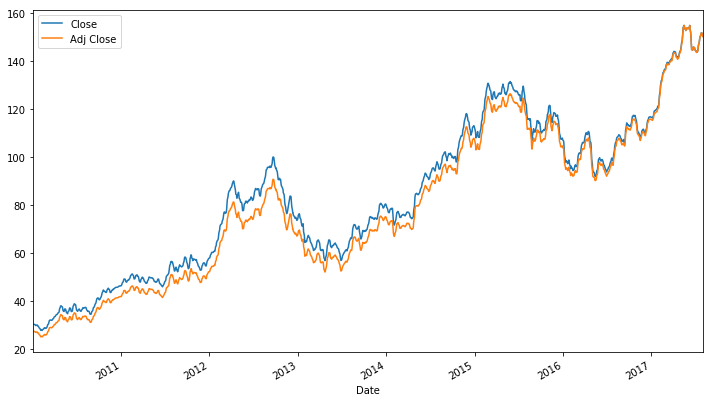

In [ ]:
aapl.rolling(5)[['Close', 'Adj Close']].mean().plot();

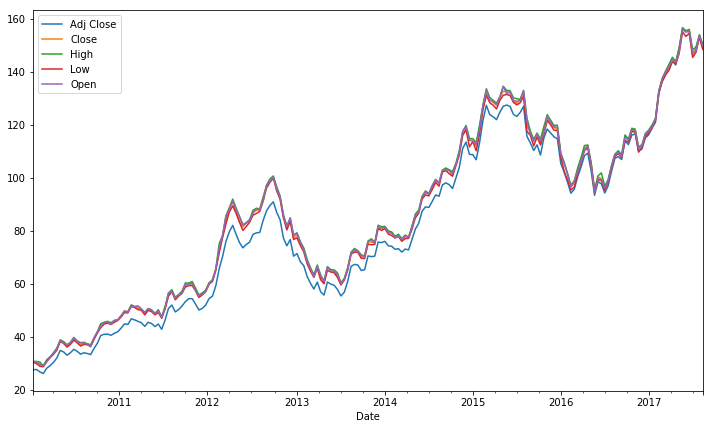

In [ ]:
# Drop `Volume`, since it's way bigger than everything else.
aapl.drop('Volume', axis=1).resample('2W').max().plot();

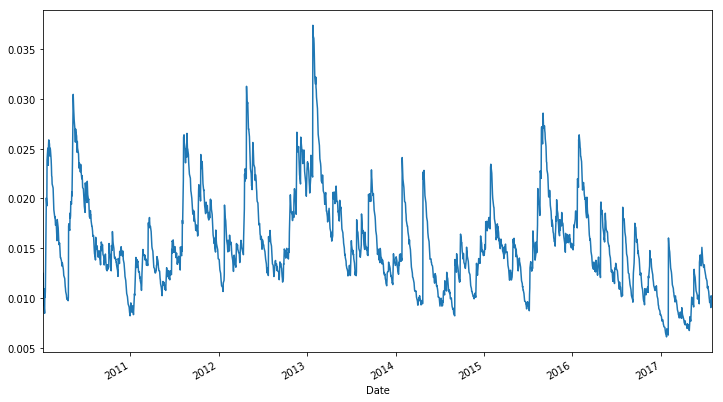

In [ ]:
# 30-day rolling exponentially-weighted stddev of returns.
aapl['Close'].pct_change().ewm(span=30).std().plot();

# "Real World" Data

In [ ]:
from demos.avocados import read_avocadata

avocados = read_avocadata('2014', '2016')
avocados.head()

,Date,Region,Variety,Organic,Number of Stores,Weighted Avg Price,Low Price,High Price
0,2014-01-03 00:00:00+00:00,NATIONAL,HASS,False,9184,0.93,NaN,NaN
1,2014-01-03 00:00:00+00:00,NATIONAL,HASS,True,872,1.44,NaN,NaN
2,2014-01-03 00:00:00+00:00,NORTHEAST,HASS,False,1449,1.08,0.5,1.67
3,2014-01-03 00:00:00+00:00,NORTHEAST,HASS,True,66,1.54,1.5,2.00
4,2014-01-03 00:00:00+00:00,SOUTHEAST,HASS,False,2286,0.98,0.5,1.99


In [ ]:
# Unlike numpy arrays, pandas DataFrames can have a different dtype for each column.
avocados.dtypes

Date                  datetime64[ns, UTC]
Region                             object
Variety                            object
Organic                              bool
Number of Stores                    int64
Weighted Avg Price                float64
Low Price                         float64
High Price                        float64
dtype: object

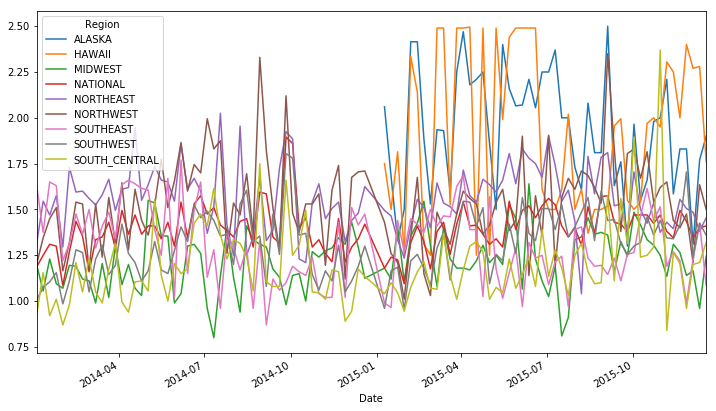

In [ ]:
# What's the regional average price of a HASS avocado every day?
hass = avocados[avocados.Variety == 'HASS']
hass.groupby(['Date', 'Region'])['Weighted Avg Price'].mean().unstack().ffill().plot();

In [ ]:
def _organic_spread(group):

    if len(group.columns) != 2:
        return pd.Series(index=group.index, data=0.0)

    is_organic = group.columns.get_level_values('Organic').values.astype(bool)
    organics = group.loc[:, is_organic].squeeze()
    non_organics = group.loc[:, ~is_organic].squeeze()
    diff = organics - non_organics
    return diff

def organic_spread_by_region(df):
    """What's the difference between the price of an organic
    and non-organic avocado within each region?
    """
    return (
        df
        .set_index(['Date', 'Region', 'Organic'])
         ['Weighted Avg Price']
        .unstack(level=['Region', 'Organic'])
        .ffill()
        .groupby(level='Region', axis=1)
        .apply(_organic_spread)
    )

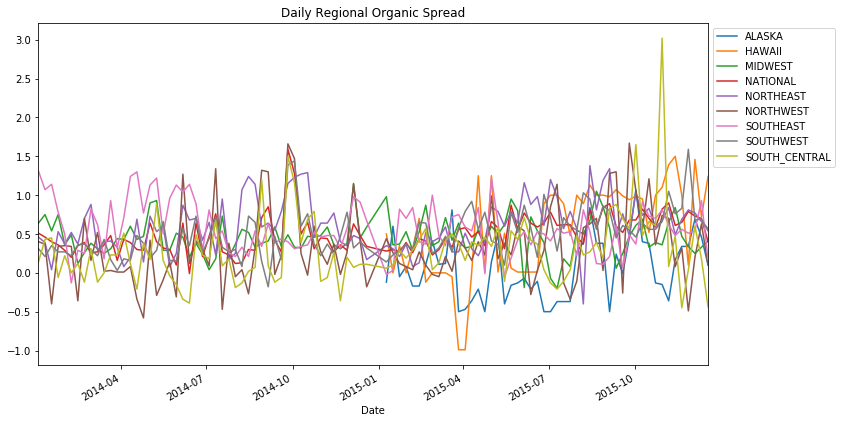

In [ ]:
organic_spread_by_region(hass).plot();
plt.gca().set_title("Daily Regional Organic Spread");
plt.legend(bbox_to_anchor=(1, 1));

In [ ]:
spread_correlation = organic_spread_by_region(hass).corr()
spread_correlation

Region,ALASKA,HAWAII,MIDWEST,NATIONAL,NORTHEAST,NORTHWEST,SOUTHEAST,SOUTHWEST,SOUTH_CENTRAL
Region,,,,,,,,,
ALASKA,1.000000,0.202723,0.175251,0.007844,0.051049,0.087575,0.129079,-0.070868,0.161624
HAWAII,0.202723,1.000000,-0.021116,0.373914,0.247171,0.341155,0.019388,0.159192,0.092632
MIDWEST,0.175251,-0.021116,1.000000,0.062595,-0.010213,-0.043783,0.047437,-0.059128,0.068902
NATIONAL,0.007844,0.373914,0.062595,1.000000,0.502035,0.579102,-0.040539,0.635006,0.486524
NORTHEAST,0.051049,0.247171,-0.010213,0.502035,1.000000,0.242039,-0.236225,0.360389,0.149881
NORTHWEST,0.087575,0.341155,-0.043783,0.579102,0.242039,1.000000,-0.032306,0.165992,0.349935
SOUTHEAST,0.129079,0.019388,0.047437,-0.040539,-0.236225,-0.032306,1.000000,-0.167631,-0.021176
SOUTHWEST,-0.070868,0.159192,-0.059128,0.635006,0.360389,0.165992,-0.167631,1.000000,0.254504
SOUTH_CENTRAL,0.161624,0.092632,0.068902,0.486524,0.149881,0.349935,-0.021176,0.254504,1.000000


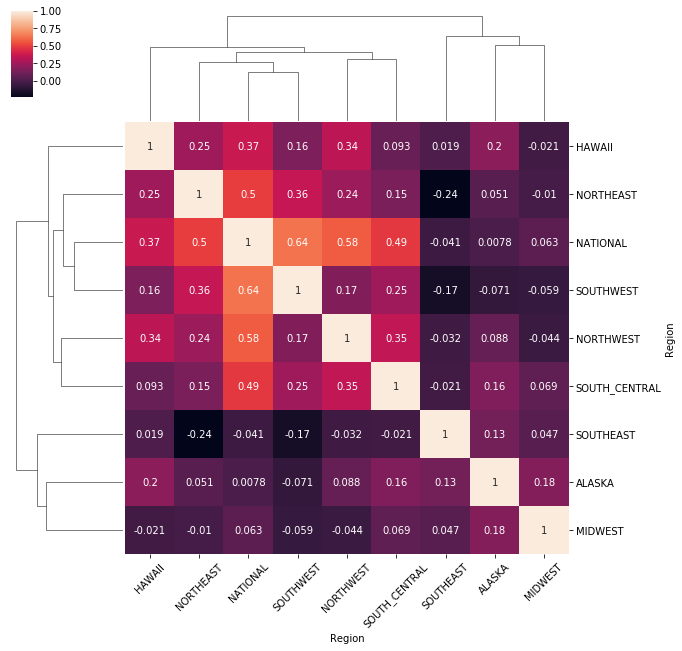

In [ ]:
import seaborn as sns
grid = sns.clustermap(spread_correlation, annot=True)
fig = grid.fig
axes = fig.axes
ax = axes[2]
ax.set_xticklabels(ax.get_xticklabels(), rotation=45);

# Pandas Review

- Pandas extends numpy with more complex datastructures and algorithms.
- If you understand numpy, you understand 90% of pandas.
- `groupby`, `set_index`, and `unstack` are powerful tools for working with categorical data.
- Avocado prices are surprisingly interesting :)

# Thanks!